## Required Packages

In [ ]:
import sys, os
#The os and sys modules provide numerous tools to deal with filenames, paths, directories
import math
import tensorflow as tf
#for data automation, model tracking, performance monitoring, and model retraining
import numpy as np
import pandas as pd
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import skimage
#Scikit-image, or skimage, is an open source Python package designed for image preprocessing.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


h5 format

In [ ]:
# ref - https://github.com/MarkPrecursor/SRCNN-keras/blob/master/prepare_data.py
# Build train dataset
import h5py
#The h5py package is a Pythonic interface to the HDF5 binary data format.
#HDF5 lets you store huge amounts of numerical data, and easily manipulate that data from NumPy.

names = sorted(os.listdir('/content/drive/MyDrive/dataset/Benchmark dataset/SRCNN/Trainn'))

data = []
label = []

for name in names:
    fpath = '/content/drive/MyDrive/dataset/Benchmark dataset/SRCNN/Trainn/' + name
    hr_img = cv2.imread(fpath, cv2.IMREAD_COLOR)
    #print(hr_img)
    hr_img = cv2.cvtColor(hr_img, cv2.COLOR_BGR2YCrCb)
    hr_img = hr_img[:, :, 0]
    #print(hr_img)
    shape = hr_img.shape
    print(shape)

    # resize operation to produce training data and labels
    lr_img = cv2.resize(hr_img, (int(shape[1] / 2), int(shape[0] / 2)))
    lr_img = cv2.resize(lr_img, (shape[1], shape[0]))

    width_range = int((shape[0] - 16 * 2) / 16)
    height_range = int((shape[1] - 16 * 2) / 16)

    for k in range(width_range):
        for j in range(height_range):
            x = k * 16
            y = j * 16

            hr_patch = hr_img[x: x + 32, y: y + 32]
            lr_patch = lr_img[x: x + 32, y: y + 32]

            hr_patch = hr_patch.astype(np.float32) / 255.
            lr_patch = lr_patch.astype(np.float32) / 255.

            hr = np.zeros((1, 20, 20), dtype=np.double)
            lr = np.zeros((1, 32, 32), dtype=np.double)

            hr[0, :, :] = hr_patch[6:-6, 6: -6]
            lr[0, :, :] = lr_patch

            label.append(hr)
            data.append(lr)

data = np.array(data, dtype=np.float32)
label = np.array(label, dtype=np.float32)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

In [ ]:
with h5py.File('train.h5', 'w') as h:
    h.create_dataset('data', data=data, shape=data.shape)
    h.create_dataset('label', data=label, shape=label.shape)

In [ ]:
# ref - https://github.com/MarkPrecursor/SRCNN-keras/blob/master/prepare_data.py
# Build test dataset

names = sorted(os.listdir('/content/drive/MyDrive/dataset/Benchmark dataset/SRCNN/Test/set55/'))
nums = len(names)

data_test = np.zeros((nums * 30, 1, 32, 32), dtype=np.double)
label_test = np.zeros((nums * 30, 1, 20, 20), dtype=np.double)

for i, name in enumerate(names):
    fpath = '/content/drive/MyDrive/dataset/Benchmark dataset/SRCNN/Test/set55/' + name
    hr_img = cv2.imread(fpath, cv2.IMREAD_COLOR)
    hr_img = cv2.cvtColor(hr_img, cv2.COLOR_BGR2YCrCb)
    hr_img = hr_img[:, :, 0]
    shape = hr_img.shape

    # resize operation to produce training data and labels
    lr_img = cv2.resize(hr_img, (int(shape[1] / 2), int(shape[0] / 2)))
    lr_img = cv2.resize(lr_img, (shape[1], shape[0]))

    # Produce random crop
    x = np.random.randint(0, min(shape[0], shape[1]) - 32, 30)
    y = np.random.randint(0, min(shape[0], shape[1]) - 32, 30)

    for j in range(30):
        lr_patch = lr_img[x[j]:x[j] + 32, y[j]:y[j] + 32]
        hr_patch = hr_img[x[j]:x[j] + 32, y[j]:y[j] + 32]

        lr_patch = lr_patch.astype(np.float32) / 255.
        hr_patch = hr_patch.astype(np.float32) / 255.

        data_test[i * 30 + j, 0, :, :] = lr_patch
        label_test[i * 30 + j, 0, :, :] = hr_patch[6: -6, 6: -6]

In [ ]:
with h5py.File('test.h5', 'w') as h:
    h.create_dataset('data', data=data_test, shape=data_test.shape)
    h.create_dataset('label', data=label_test, shape=label_test.shape)

## Build SR-CNN Model
Dataset:h5 format. Build SR-CNN model using tensorflow.

Initializers define the way to set the initial random weights of Keras layers.
    #The keyword arguments used for passing initializers to layers depends on the layer.
    #Usually, it is simply kernel_initializer and bias_initializer:
The **Glorot uniform** initializer, also called **Xavier uniform** initializer.

Also available via the shortcut function tf.keras.initializers.glorot_uniform.

Draws samples from a uniform distribution within [-limit, limit], where limit = sqrt(6 / (fan_in + fan_out)) (fan_in is the number of input units in the weight tensor and fan_out is the number of output units).
Glorot & Bengio, AISTATS 2010 - http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf

**Bias** is that enables the model to find weights to a function closer to the ground truth.
The **rectified linear activation function or ReLU** for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

In [ ]:
# Define the SR-CNN model
def model():
    SRCNN = tf.keras.Sequential(name='SRCNN')
    #filters = no. nodes
    #input shape is any image with one channel no specific ht or wdth
    #3 layers
    SRCNN.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(9, 9),
                                     padding='VALID',
                                     use_bias=True,
                                     input_shape=(None, None, 1),
                                     kernel_initializer='glorot_normal',
                                     activation='relu'))
    SRCNN.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                     padding='SAME',
                                     use_bias=True,
                                     kernel_initializer='glorot_normal',
                                     activation='relu'))
    SRCNN.add(tf.keras.layers.Conv2D(filters=1, kernel_size=(5, 5),
                                     padding='VALID',
                                     use_bias=True,
                                     kernel_initializer='glorot_normal',
                                     activation='linear'))
    # Optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)

    # Compile model
    SRCNN.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])

    return SRCNN

An **optimizer** is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.
Gradient Descent
Stochastic Gradient Descent
Stochastic Gradient descent with momentum
Mini-Batch Gradient Descent
Adagrad
RMSProp
AdaDelta
Adam

Epoch – The number of times the algorithm runs on the whole training dataset.

Sample – A single row of a dataset.

Batch – It denotes the number of samples to be taken to for updating the model parameters.

Learning rate – It is a parameter that provides the model a scale of how much model weights should be updated.

Cost Function/Loss Function – A cost function is used to calculate the cost that is the difference between the predicted value and the actual value.

Weights/ Bias – The learnable parameters in a model that controls the signal between two neurons.
**Adam optimization** is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. learning_rate: Defaults to 0.001

## Train the model
Now, it is time to train the model. How does our model look like?

In [ ]:
srcnn_model = model()
srcnn_model.summary()

Model: "SRCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, None, None, 128)     │          10,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, None, None, 64)      │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, None, None, 1)       │           1,601 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,889 (335.50 KB)

 Trainable params: 85,889 (335.50 KB)

 Non-trainable params: 0 (0.00 B)

Then we load the dataset from prebuilt h5 file. An it will be helpful to define checkpoint.

In [ ]:
with h5py.File('./train.h5', 'r') as h:
    data = np.array(h.get('data'))
    label = np.array(h.get('label'))
    X_train = np.transpose(data, (0, 2, 3, 1))
    y_train = np.transpose(label, (0, 2, 3, 1))

with h5py.File('./test.h5', 'r') as h:
    data = np.array(h.get('data'))
    label = np.array(h.get('label'))
    X_test = np.transpose(data, (0, 2, 3, 1))
    y_test = np.transpose(label, (0, 2, 3, 1))

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((81536, 32, 32, 1), (81536, 20, 20, 1), (150, 32, 32, 1), (150, 20, 20, 1))

In [ ]:
checkpoint_path = './srcnn/cp-{epoch:04d}.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                                 save_weights_only=True,
                                                 verbose=0)


In [ ]:
history=srcnn_model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test),
                callbacks=[checkpoint], shuffle=True, epochs=50, verbose=False)

Finally, Training is done.

In [ ]:
pd.DataFrame(history.history)

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,0.002365,0.002365,0.001086,0.001086
1,0.001353,0.001353,0.001056,0.001056
2,0.001179,0.001179,0.001095,0.001095
3,0.001053,0.001053,0.001051,0.001051
4,0.000977,0.000977,0.001019,0.001019
5,0.000918,0.000918,0.000987,0.000987
6,0.000860,0.000860,0.000959,0.000959
7,0.000813,0.000813,0.000942,0.000942
8,0.000776,0.000776,0.000937,0.000937
9,0.000729,0.000729,0.000941,0.000941


<Axes: >

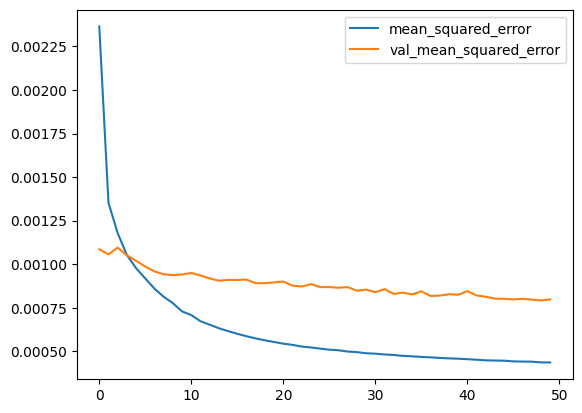

In [ ]:
pd.DataFrame(history.history)[['mean_squared_error', 'val_mean_squared_error']].plot()

## Predict image from model

Let's try it and see its work.

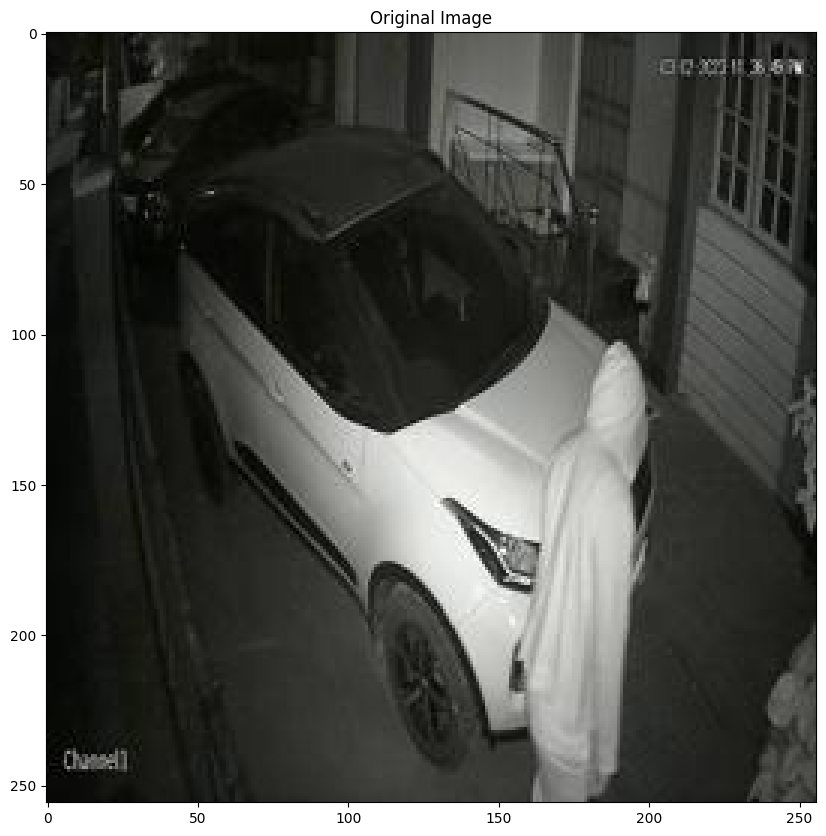

In [ ]:
from PIL import Image
fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(Image.open('/content/drive/MyDrive/dataset/Benchmark dataset/SRCNN/Test/set55/frame_30625.jpg'))
ax.title.set_text("Original Image")
plt.show()

Then we need to make distorted image by resizing down and up.

In [ ]:
import cv2
import os

# Make output directory
output_dir = '/content/drive/MyDrive/dataset/Benchmark dataset/SRCNN/output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

target = cv2.imread('/content/drive/MyDrive/dataset/Benchmark dataset/SRCNN/Test/set55/frame_30625.jpg', cv2.IMREAD_COLOR)
target = cv2.cvtColor(target, cv2.COLOR_BGR2YCrCb)
shape = target.shape

# Resize down by scale of 2
Y_img = cv2.resize(target[:, :, 0], (int(shape[1] / 2), int(shape[0] / 2)), cv2.INTER_CUBIC)

# Resize up to original image size
Y_img = cv2.resize(Y_img, (shape[1], shape[0]), cv2.INTER_CUBIC)
target[:, :, 0] = Y_img
target = cv2.cvtColor(target, cv2.COLOR_YCrCb2BGR)

# Corrected file path for saving the image
output_path = os.path.join(output_dir, 'input.jpg')
cv2.imwrite(output_path, target)

print("Image saved successfully.")


Image saved successfully.


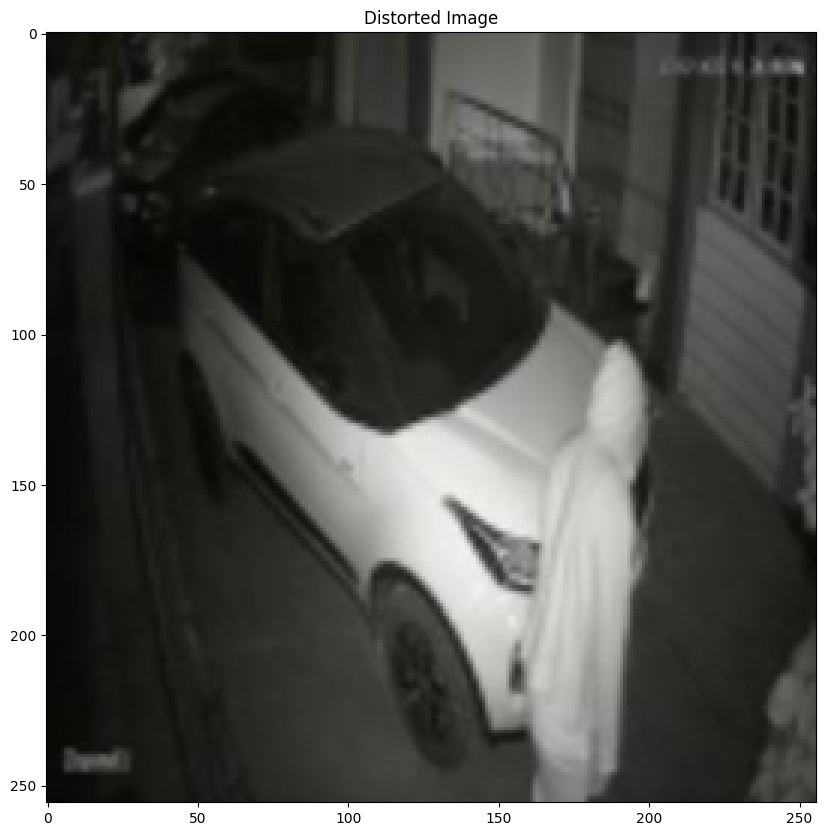

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(Image.open('/content/drive/MyDrive/dataset/Benchmark dataset/SRCNN/output/input.jpg'))
ax.title.set_text("Distorted Image")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


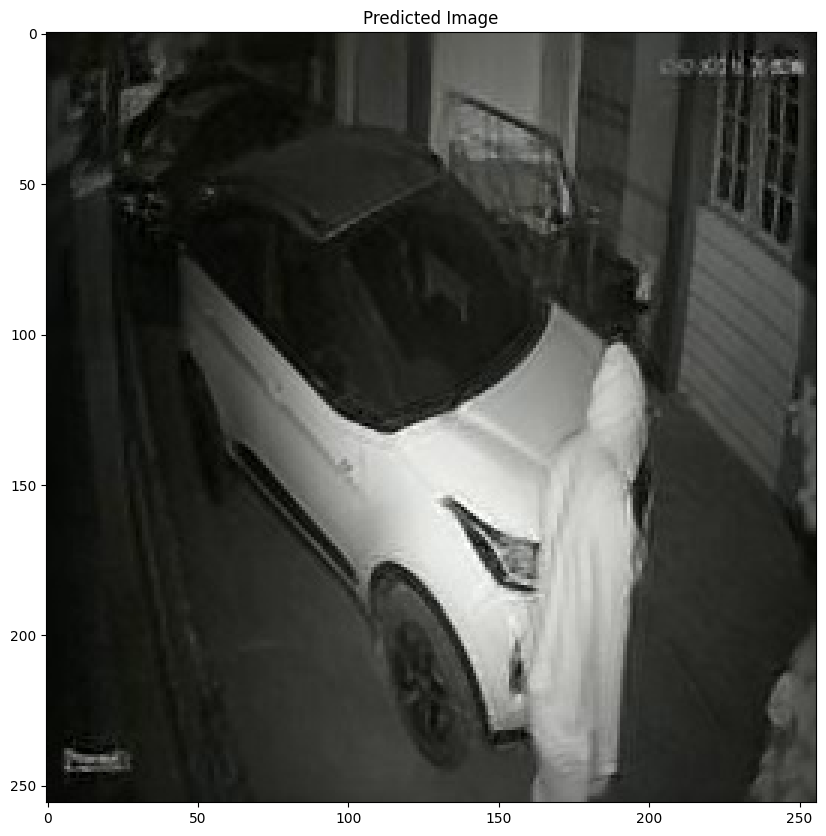

In [ ]:
Y = np.zeros((1, target.shape[0], target.shape[1], 1), dtype=np.float32)
# Normalize
Y[0, :, :, 0] = Y_img.astype(np.float32) / 255.

# Predict
pre = srcnn_model.predict(Y, batch_size=1) * 255.

# Post process output
pre[pre[:] > 255] = 255
pre[pre[:] < 0] = 0
pre = pre.astype(np.uint8)

# Copy y channel back to image and convert to BGR
output = cv2.cvtColor(target, cv2.COLOR_BGR2YCrCb)
output[6: -6, 6: -6, 0] = pre[0, :, :, 0]
output = cv2.cvtColor(output, cv2.COLOR_YCrCb2BGR)

# Save image
cv2.imwrite('/content/drive/MyDrive/dataset/Benchmark dataset/SRCNN/output/output.jpg', output)

fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(Image.open('/content/drive/MyDrive/dataset/Benchmark dataset/SRCNN/output/output.jpg'))
ax.title.set_text("Predicted Image")
plt.show()

We can compare those images simultaneously.

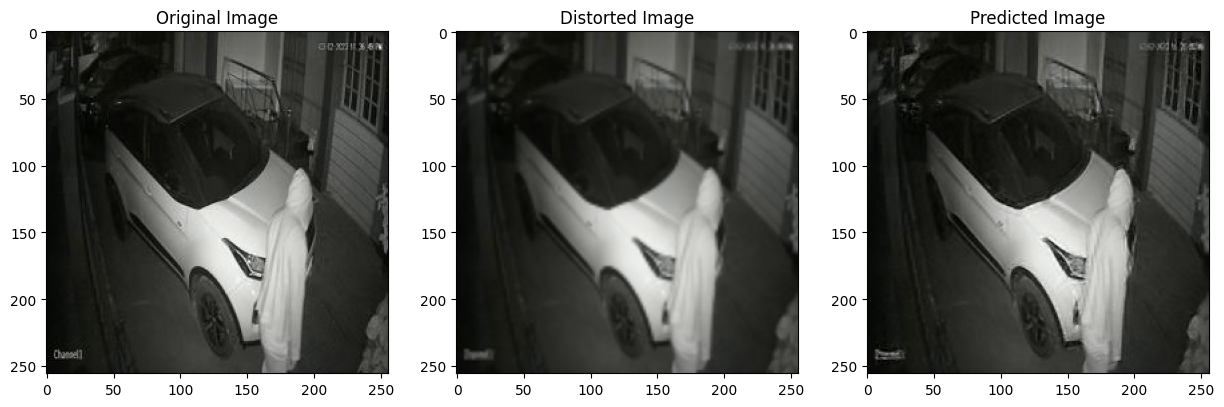

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(Image.open('/content/drive/MyDrive/dataset/Benchmark dataset/SRCNN/Test/set55/frame_30625.jpg'))
ax[0].title.set_text("Original Image")

ax[1].imshow(Image.open('/content/drive/MyDrive/dataset/Benchmark dataset/SRCNN/output/input.jpg'))
ax[1].title.set_text("Distorted Image")

ax[2].imshow(Image.open('/content/drive/MyDrive/dataset/Benchmark dataset/SRCNN/output/output.jpg'))
ax[2].title.set_text("Predicted Image")

Here, we can use PSNR and SSIM metrics for comparison. Of course, we need to compare each images with original image.

In [ ]:
original = cv2.imread('/content/drive/MyDrive/dataset/Benchmark dataset/SRCNN/Test/set55/frame_30625.jpg')
distorted = cv2.imread('/content/drive/MyDrive/dataset/Benchmark dataset/SRCNN/output/input.jpg')
predicted = cv2.imread('/content/drive/MyDrive/dataset/Benchmark dataset/SRCNN/output/output.jpg')

## Metric Functions
Metrics to measure image quality

- [Peak Signal to Noise Ratio] (PSNR)
- Mean Squared Error (MSE)
- [Structural Similarity] (SSIM)

 **PSNR** is the ratio between the maximum possible power of a signal and the power of corrupting noise that affects the fidelity of its representation. It is usually expressed in terms of logarithmic decibel (dB) scale, and has following relation,

$$ \text{MSE} = \frac{1}{mn} \sum_{i=0}^{m-1} \sum_{j=0}^{n-1}[I(i, j) - K(i, j)]^2 $$

Here, $I$ is monochrome image and $K$ is its noisy approximation. Expressed in dB scale,

$$ \begin{aligned} PSNR &= 10 \cdot \log_{10} \Big(\frac{\text{MAX}_I^2}{\text{MSE}}\Big) \\ &= 20 \cdot \log_{10}(\text{MAX}_I) - 10 \cdot \log_{10}(\text{MSE}) \end{aligned} $$

From the formula, Image quality will be better if the PSNR value is high, since maximum pixel value is much higher than MSE value.

And **SSIM** is a method for predicting the perceived quality, and it is used for measuring the similarity between two images. If this value is close to 1, then two images are identical. Otherwise, two images will be totally different. Think about it that we can increase PSNR while maintaining the SSIM. That maybe works in CNN. So it is required to define these metrics.

### Quality Measures

*   Peak Signal-to-Noise Ratio (PSNR)
           OpenCV has psnr method (`cv2.psnr`)
*   Mean Squared Error
*   Structural Similarity Index Measure
*   Combine whole metrics in one metric to measure image quaility

In [ ]:
def psnr(target, ref):
    # Assume target is RGB/BGR image
    target_data = target.astype(np.float32)
    ref_data = ref.astype(np.float32)

    diff = ref_data - target_data
    #flatten flatten the array and original array same but in ravel change the original array.
    rmse = np.sqrt(np.mean(diff ** 2.))

    return 20 * np.log10(255. / rmse)

In [ ]:
def mse(target, ref):
    target_data = target.astype(np.float32)
    ref_data = ref.astype(np.float32)
    err = np.sum((target_data - ref_data) ** 2)
    print(err)
    err /= float(target_data.shape[0] * target_data.shape[1])
    print(err)
    return err

In [ ]:
from skimage.metrics import structural_similarity as ssim

In [ ]:
def compare_images(target, ref):
    scores = []
    scores.append(psnr(target, ref))
    scores.append(mse(target, ref))
    scores.append(ssim(target, ref, multichannel=True))
    return scores

In [ ]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse

def compare_images(target, ref):
    scores = []
    # PSNR score
    scores.append(psnr(target, ref))
    # MSE score
    scores.append(mse(target, ref))
    # SSIM score with smaller window size and multichannel set correctly
    scores.append(ssim(target, ref, win_size=3, channel_axis=-1))  # Assuming images are RGB
    return scores


In [ ]:
# Comparing original and distorted image
metrics = compare_images(original, distorted)
print("Metrics for original and distorted image")
print("PSNR: {}".format(metrics[0]))
print("MSE: {}".format(metrics[1]))
print("SSIM: {}".format(metrics[2]))

Metrics for original and distorted image
PSNR: 30.5643755236361
MSE: 57.10088094075521
SSIM: 0.8727639559694591


In [ ]:
# Comparing original and predicted image
metrics = compare_images(original, predicted)
print("Metrics for original and predicted image")
print("PSNR: {}".format(metrics[0]))
print("MSE: {}".format(metrics[1]))
print("SSIM: {}".format(metrics[2]))

Metrics for original and predicted image
PSNR: 31.892652678714537
MSE: 42.05475362141927
SSIM: 0.8757968984336771


## Summary
We can see that Peak Signal to Noise Ratio of predicted image is higher than that of distorted image, and same in Structural Similarity. As a result, it concludes that SR-CNN model can enhance the image quality, and the predicted output is more similar with original image.